# Введение в анализ данных
## НИУ ВШЭ, 2020-2021 учебный год

### Домашнее задание №8

In [85]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

## Градиентный бустинг своими руками (2 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.

В качестве функции потерь возьмите MSE.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [78]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize #использую после того как смогу сделать с gamma=1
from sklearn.metrics import mean_squared_error
import numpy as np

In [79]:
b = np.ones(12)
a = np.zeros(12)
a = a + b
a = np.vstack((a, np.ones(12)))
a = np.vstack((a, np.ones(12)))
a[-1] = a[-1] + 3
a#sum(a[i] for i in range(len(a)))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])

In [80]:
from sklearn.metrics import mean_squared_error as MSE
from sympy import diff, symbols
x, y = symbols('x y')

In [81]:
MSE([5, 0],[6,2])
diff(MSE([5, 0],[6,2])*x, x)

2.50000000000000

In [112]:
from sklearn import tree
from sklearn.metrics import mean_squared_error as MSE
from scipy.optimize import minimize
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.gamma = np.zeros(1000)
        self.b = np.zeros(1000)
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        gamma = 1
        self.gamma = np.zeros(len(x))
        self.b = np.zeros(len(x))
        a = self._fit_predict_tree(x,y)
        a = np.vstack((np.zeros(self.n_estimators), a))
        for p in range(1, self.n_estimators):  
            b = fit_predict_tree(x, optimize.minimize(lambda x: x - sum(a[i] for i in range(len(a)))))
            self.b = np.vstack((self.b,b))
            a = np.vstack((a, a[p] + gamma*learning_rate*b))
            
    def _fit_predict_tree(self, x, y):
        # Обучаем дерево и возвращаем его предикшн
        a = tree.DecisionTreeRegressor(x,y)
        self.b = self.predict(x)
        return self.b
        
    def predict(self, a):
        """
        INPUT:
        a - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        y_pred =  sum(a[i] for i in range(len(a)+1))
        return y_pred

Проверьте вашу реализацию на Boston dataset. Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.

In [113]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.63198271791959

In [115]:
np.random.seed(19052019)

gb = GradientBoosting(100, 6)

gb.fit(X_train, y_train)
mean_squared_error(y_test, gb.predict(X_test))

C:\Users\dasha\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass criterion=[[1.7171e-01 2.5000e+01 5.1300e+00 ... 1.9700e+01 3.7808e+02 1.4440e+01]
 [1.2083e-01 0.0000e+00 2.8900e+00 ... 1.8000e+01 3.9690e+02 4.2100e+00]
 [6.2976e-01 0.0000e+00 8.1400e+00 ... 2.1000e+01 3.9690e+02 8.2600e+00]
 ...
 [7.8960e-02 0.0000e+00 1.2830e+01 ... 1.8700e+01 3.9492e+02 6.7800e+00]
 [7.0220e-02 0.0000e+00 4.0500e+00 ... 1.6600e+01 3.9323e+02 1.0110e+01]
 [3.3060e-02 0.0000e+00 5.1900e+00 ... 2.0200e+01 3.9614e+02 8.5100e+00]], splitter=[16.  38.7 20.4 22.5 21.7 12.7  5.  21.4 23.7 21.  19.5 20.1 24.6 36.1
 23.  18.5 32.5 19.1 23.3 18.5 21.5 19.3 26.4 31.  22.3 13.3  7.  22.5
 27.5 30.1 10.2 20.  25.  17.8 13.8 32.  23.7 23.8 16.7 23.8 18.8 22.
 29.  21.2 33.1 30.7 24.8 21.7 37.6 23.1 22.9 13.6 14.6 18.9 22.6 31.7
 19.4 12.7 20.1 30.3 18.8  8.1 20.6 33.2 21.1 31.5 20.   8.5 22.2 24.8
 50.  21.7 24.  15.  13.5  9.7 18.9 22.6 29.6 20.6 24.3 16.2 19.6 35.1
 17.5 12.5 22.2 2

IndexError: index 379 is out of bounds for axis 0 with size 379

In [ ]:
mean_squared_error(y_test, y_pred)

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {XGboost, catboost, LightGBM} и GridSearch для достижения результата. Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_test.csv')

In [4]:
train['dep_delayed_15min'] = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

In [5]:
y_train = train['dep_delayed_15min']

In [6]:
del train['dep_delayed_15min']

In [7]:
print(train['Month'].unique(),
      train['DayOfWeek'].unique(),
      train['DayofMonth'].unique())

['c-8' 'c-4' 'c-9' 'c-11' 'c-10' 'c-1' 'c-7' 'c-6' 'c-5' 'c-3' 'c-12'
 'c-2'] ['c-7' 'c-3' 'c-5' 'c-6' 'c-4' 'c-2' 'c-1'] ['c-21' 'c-20' 'c-2' 'c-25' 'c-7' 'c-3' 'c-27' 'c-29' 'c-28' 'c-5' 'c-6'
 'c-10' 'c-19' 'c-26' 'c-14' 'c-22' 'c-9' 'c-31' 'c-4' 'c-16' 'c-18'
 'c-30' 'c-1' 'c-24' 'c-15' 'c-17' 'c-8' 'c-12' 'c-13' 'c-11' 'c-23']


In [8]:
d = {'c-1': 1, 'c-2': 2, 'c-3': 3, 'c-4': 4, 'c-5': 5, 'c-6': 6, 'c-7': 7, 'c-8': 8, 'c-9': 9, 'c-10': 10, 
    'c-11': 11, 'c-12': 12, 'c-13': 13, 'c-14': 14, 'c-15': 15, 'c-16': 16, 'c-17': 17, 'c-18': 18, 'c-19': 19, 'c-20': 20,
    'c-21': 21, 'c-22': 22, 'c-23': 23, 'c-24': 24, 'c-25': 25, 'c-26': 26, 'c-27': 27, 'c-28': 28, 'c-29': 29, 'c-30': 30,
    'c-31': 31}
train['Month']=train['Month'].map(d).values
train['DayOfWeek']=train['DayOfWeek'].map(d).values
train['DayofMonth']=train['DayofMonth'].map(d).values

test['Month']=test['Month'].map(d).values
test['DayOfWeek']=test['DayOfWeek'].map(d).values
test['DayofMonth']=test['DayofMonth'].map(d).values

In [9]:
data_dum=pd.get_dummies(train, drop_first=True)
data_dum_test=pd.get_dummies(test, drop_first=True)

In [10]:
list1=data_dum.columns
list2=data_dum_test.columns
list3 = set(list2)-set(list1)
list4=set(list1)-set(list2)
nn1 = np.zeros((len(data_dum),1))
nn2 = np.zeros((len(data_dum_test),1))

In [11]:
for p in list3:
    if p not in list1:
        data_dum[p]=nn1
for p in list4:
    if p not in list2:
        data_dum_test[p]=nn2

In [12]:
data_dum.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,...,UniqueCarrier_AA,Origin_ROW,Origin_TTN,Dest_PMD,Dest_MTH,Origin_ALO,Origin_PLN,Dest_YKM,Dest_HHH,Origin_SUX
0,8,21,7,1934,732,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,20,3,1548,834,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,2,5,1422,416,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,25,6,1015,872,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,7,6,1828,423,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_dum_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,...,Dest_HVN,Origin_HVN,UniqueCarrier_DH,Origin_PIE,Origin_VIS,Dest_GST,Origin_VCT,Dest_CDC,Dest_HKY,Dest_VIS
0,7,25,3,615,598,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,17,2,739,1235,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,2,7,651,577,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,25,7,1614,377,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,6,3,1505,258,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Обработка данных завершена. Теперь займемся прогнозированием

In [16]:
# Определимся с обучающей и тестовой выборкой

#data = data_dum.copy()
#y_train = data_dum['dep_delayed_15min']

#del data['dep_delayed_15min']
X_train = data_dum.values

X_test = data_dum_test.values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

In [17]:
pip install catboost

In [18]:
#Неудачная попытка
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=1,
                        depth=12,
                        learning_rate=0.00001,
                       )
catboost_model.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, catboost_model.predict_proba(X_valid)[:, 1])

0:	learn: 0.6931416	total: 383ms	remaining: 0us


0.6739309067039378

In [19]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [20]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

In [22]:
#Удачная попытка!!!
lgb_model = LGBMClassifier(max_depth = 17, n_estimators=200, learning_rate=0.1, min_split_gain=1)
lgb_model.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, lgb_model.predict_proba(X_valid)[:, 1])

0.7421088221608282

## DBSCAN своими руками (2 + 2* баллов)

DBSCAN: Density-based spatial clustering of applications with noise

Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [122]:
# Это может помочь вам для поиска дистанции между точками
from scipy.spatial import distance

In [130]:
class dbscan():
    def __init__(self, epsilon=1, min_samples=5):
        self.epsilon = epsilon
        self.min_points = min_samples
        self.cluster_label = 0
        self.noise = 0
        
    def fit_predict(self, X):
        
        # Пометили все данные точки (-1), т.е. как неклассифицированные
        X = np.append(X, np.zeros((len(X),1)) - 1, axis=1)        
        for x in range(len(X)):            
            
            # Рассмтариваем именно неклассифицированные точки
            if X[x,2] != -1:
                continue         
                
            # Найдем соседей для точки (строчки) х               
            p = X[x,:2] #р - координаты рассматриваемой точки
            neighbors = self.range_query(p, X) #применим функцию для поиска соседей
            
            # Если соседей меньше min_points, определяем точку как шумовую            
            if len(neighbors) < self.min_points:
                X[x,2] = self.noise
                continue
            self.cluster_label += 1 # увеличиваем метку точек, вошедших в кластер, на 1
            X[x,2] = self.cluster_label # и присваиваем этот лэйбл рассматриваемой точке, которая уже 100% не шум
                
            self.grow_cluster(X, p, neighbors)
            
        return X[:, 2]                   
    
    def grow_cluster(self, X, root, neighbors):
        # В этой функции мы полностью строим кластер относительно переданной точки
        # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
        # известных соседей (neighbours) и в процессе пополняющейся
        # "соседями соседей" с помощью range_query()
        
        found_neighbors = neighbors
        q = neighbors
        for current in neighbors:
            if X[current, 2] == 0: #если точка из соседей - шумовая
                X[current,2] = self.cluster_label #делаем её кластеризированной
            if X[current,2] != -1: #если точка уже помечена как кластеризированная, дальше не идем
                continue
            # Работаем с некластеризированными точками:
            X[current,2] = self.cluster_label #делаем ее кластеризированной
            # и смотрим на ее соседей
            point = X[current,:2]
            neighbors2 = self.range_query(point, X)
                # и если точка  имеет достаточно соседей, тогда добавляем к рассматриваемым соседям её соседей
            if len(neighbors2) >= self.min_points:
                for x in neighbors2:
                    if x not in found_neighbors:
                        q.append(x)
                            
    def range_query(self, x, X):
        # Возвращаем все точки, которые находятся на расстоянии меньше, чем эпсилон      
        neighbors = []
        for y in range(len(X)): #перебор точек
            q = X[y, :2] 
            if self.dist(x, q) <= self.epsilon: #нужные нам добавляем в neighbors
                neighbors.append(y)        
        return neighbors
    
    @staticmethod
    def dist(a, b):
        """Метрика расстояния"""
        return distance.euclidean(a,b)

Проверим себя на простом примере:

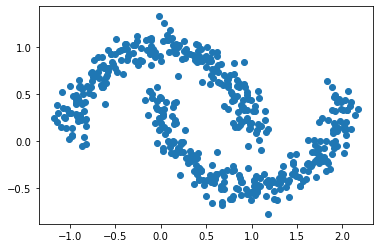

In [143]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте это с помощью своей версии DBSCAN:

Референс:

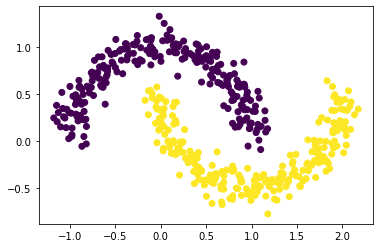

In [144]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

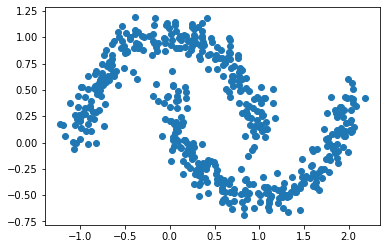

In [135]:
X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

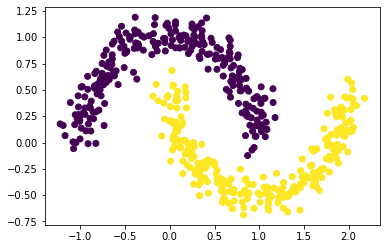

In [136]:
clusters = dbscan(epsilon=0.2, min_samples=10).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):

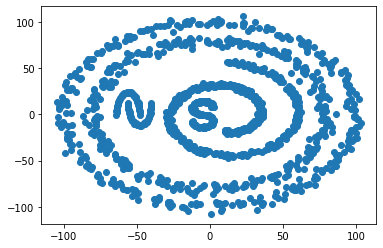

In [ ]:
# your code here

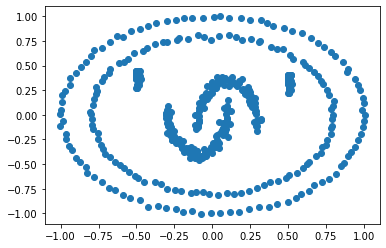

In [340]:
from sklearn import datasets

a, _ = datasets.make_moons(n_samples=200, noise =0.065)
A, labels = datasets.make_circles(n_samples=200, noise = 0.01)
B, labels = datasets.make_multilabel_classification(n_samples=100)
a[:, 0] = a[:, 0] *0.2  - 0.1
a[:, 1] = a[:, 1] * (-0.5) + 0.1
B[:, 0] = B[:, 0] *0.003  - 0.5
B[:, 1] = B[:, 1] * (-0.03) + 0.45
B = np.vstack((B[:,0], B[:,1])).T
C = B.copy()
C[:, 0] = C[:, 0]  + 1
C[:, 1] = C[:, 1] -0.05
a = np.vstack((a,A))
a = np.vstack((a,B))
a = np.vstack((a,C))
plt.scatter(a[:,0], a[:,1])
plt.show()
#Недовольная утка

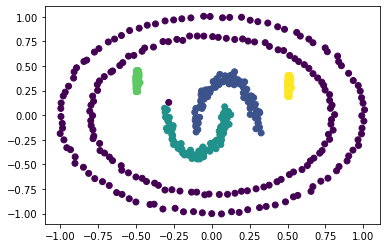

In [339]:
clusters = DBSCAN(eps=0.06, min_samples=5).fit_predict(a)

plt.scatter(a[:,0], a[:,1], c=clusters)
plt.show()
#Теперь она разноцветная. Но всё-равно недовольная

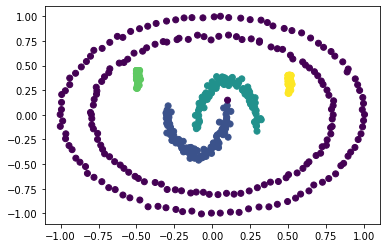

In [341]:
clusters = dbscan(epsilon=0.06, min_samples=5).fit_predict(a)
plt.scatter(a[:,0], a[:,1], c=clusters)
plt.show()

Или хотя бы что-нибудь такое: 

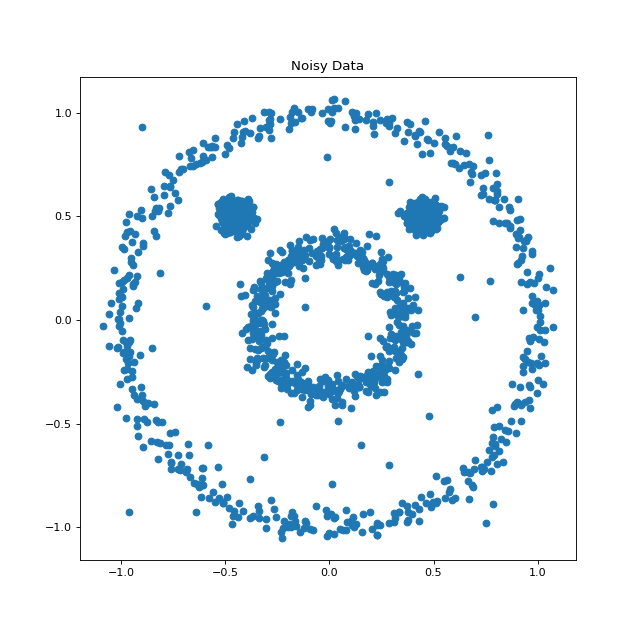

Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:

In [329]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 116 ms


In [330]:
%%time
%%capture
clusters = dbscan(epsilon=0.2, min_samples=10).fit_predict(X)

Wall time: 5.5 s


In [333]:
a = 116 * 0.97 * 100 / 1000
print(a>5.5)

True
